In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
from sklearn.utils.multiclass import unique_labels # unique
import time
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Import the Random Forest Model
from sklearn.ensemble import RandomForestRegressor
# Import the Gradient Boost Model
from sklearn.ensemble import GradientBoostingClassifier
# Import the XGBoost Classifier
from xgboost import XGBClassifier
# Import  Classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, f1_score, precision_score, recall_score
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder 
# SINGLE LAYER AND MULTI LAYER NETWORKS FOR MNIST
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [2]:
filename_train='fashionmnist\\fashion-mnist_train.csv'
filename_test='fashionmnist\\fashion-mnist_test.csv'

In [3]:
# Load Data
train=pd.read_csv(filename_train)
test=pd.read_csv(filename_test)

#Labels 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}


In [4]:
print(f'Number of row and columns in the training dataset are {train.shape}')
print(f'Number of row and columns in the test dataset are {test.shape}')

Number of row and columns in the training dataset are (60000, 785)
Number of row and columns in the test dataset are (10000, 785)


In [5]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Show a sample image

In [7]:
def convert_to_image_array(data):
    img_data = []
    img_label= []
    # Append the samples to the samples list
    for j, s in enumerate(data.values):
        # First column contain labels, hence index should start from 1
        img = np.array(data.iloc[j, 1:]).reshape(28,28,1)/255
        label = data.iloc[j, 0]
        img_data.append(img)
        img_label.append(label)
    return img_data,  img_label

def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"):
    f, ax = plt.subplots(5,8, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img.reshape(img.shape[0],img.shape[1]), cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()  

In [8]:
train_images,  train_labels = convert_to_image_array(train)
test_images,  test_labels = convert_to_image_array(test)

In [10]:
def desc_wide(df):
    total = df.isnull().sum()
    percent = (df.isnull().sum()/df.isnull().count()*100)
    result = pd.concat([total, percent], axis=1, keys=['total', 'percentage'])
    result['types'] = list(df.dtypes)
    return(np.transpose(result))

In [11]:
desc_wide(train)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
percentage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
types,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,...,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64


In [13]:
train.label=train.label.astype('category')
test.label=test.label.astype('category')

In [18]:
classifier_results={}
classifier_results['classifier']=[]
classifier_results['execution_time']=[]
classifier_results['accuracy']=[]

## Models

### Model 1: Generate a model using Naive Bayes

In [27]:
%%time
start = time.time()
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(train.iloc[:,1:], train.iloc[:,0:1].values.ravel())

#Predict the response for test dataset
y_pred = gnb.predict(test.iloc[:,1:])

end = time.time()
final_time = end-start
classifier_results['classifier'].append('Naive Bayes')
classifier_results['execution_time'].append(final_time)


Wall time: 3.28 s


In [28]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test.iloc[:,0:1], y_pred))
classifier_results['accuracy'].append(metrics.accuracy_score(test.iloc[:,0:1], y_pred))

Accuracy: 0.5914


In [ ]:
print("Actual Results:")
print(confusion_matrix(test.iloc[:,0:1], test.iloc[:,0:1]))

print("Confusion Matrix:")
print(confusion_matrix(test.iloc[:,0:1], y_pred))

print("Classification Report")
print(classification_report(test.iloc[:,0:1], y_pred))

Confusion matrix, without normalization
[[594  42  25 196  87   0  16   0  40   0]
 [  0 940  16  33   2   1   8   0   0   0]
 [  4   7 324  68 553   0  21   0  23   0]
 [  6 311   6 644  25   0   5   0   3   0]
 [  0  33  37 155 765   0   1   0   9   0]
 [  1   1   1   2   0 289   6 648  14  38]
 [113  32 103 236 432   0  38   0  46   0]
 [  0   0   0   0   0   3   0 978   0  19]
 [  1   2  17  79 161   3  22   3 711   1]
 [  0   0   0   1   0  27   2 328  11 631]]


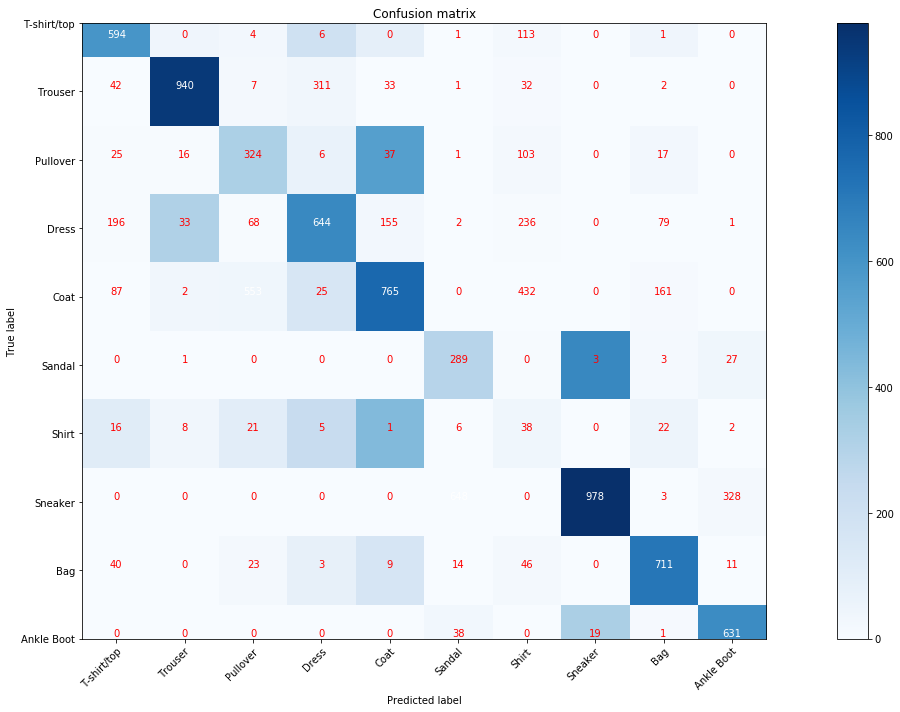

In [31]:
plot_confusion_matrix(test.iloc[:,0:1], y_pred, classes=np.array(list(labels.values())),
                      title='Confusion matrix')

In [32]:
metrics_df = pd.DataFrame()
metrics_df['model']=""
metrics_df['accuracy_score']=0
metrics_df['precision_score']=0
metrics_df['recall_score']=0
metrics_df['f1_score']=0
metrics_df.loc[0,'model']="Naive Bayes"
metrics_df.loc[0,'accuracy_score']=accuracy_score(test.iloc[:,0:1], y_pred)
metrics_df.loc[0,'precision_score']=precision_score(test.iloc[:,0:1], y_pred, average="weighted")
metrics_df.loc[0,'recall_score']=recall_score(test.iloc[:,0:1], y_pred, average="weighted")
metrics_df.loc[0,'f1_score']=f1_score(test.iloc[:,0:1], y_pred, average="weighted")
metrics_df.loc[0,'execution_time']=final_time

### Model 2 :Generate a model using Random Forest

In [42]:
%%time
start = time.time()
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
# Train the model on training data
rf.fit(train.iloc[:,1:], train.label)

# Use the forest's predict method on the test data
y_pred = rf.predict(test.iloc[:,1:])

end = time.time()
final_time = end-start
classifier_results['classifier'].append('Random Forest')
classifier_results['execution_time'].append(final_time)

Wall time: 4min 51s


In [57]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test.label.astype('int32'), (y_pred.round().astype('int32'))))
classifier_results['accuracy'].append(metrics.accuracy_score(test.label.astype('int32'), (y_pred.round().astype('int32'))))

Accuracy: 0.6634


In [ ]:
print("Actual Results:")
print(confusion_matrix(test.label.astype('int32'), (y_pred.round().astype('int32'))))

print("Confusion Matrix:")
print(confusion_matrix(test.label.astype('int32'), (y_pred.round().astype('int32'))))

print("Classification Report")
print(classification_report(test.label.astype('int32'), (y_pred.round().astype('int32'))))

Confusion matrix, without normalization
[[355 255 175 113  72  18   8   3   1   0]
 [  0 931  40  22   6   0   0   1   0   0]
 [  2   3 450 334 168  34   9   0   0   0]
 [  1  13 126 747 101  10   2   0   0   0]
 [  0   0  11 207 682  84  12   4   0   0]
 [  0   0   0   1   4 767 169  50   7   2]
 [ 10  42 102 138 237 196 266   7   2   0]
 [  0   0   0   0   0   9  62 823  91  15]
 [  0   1   1   2  15  20  45 114 802   0]
 [  0   0   0   0   0   1   6  38 144 811]]


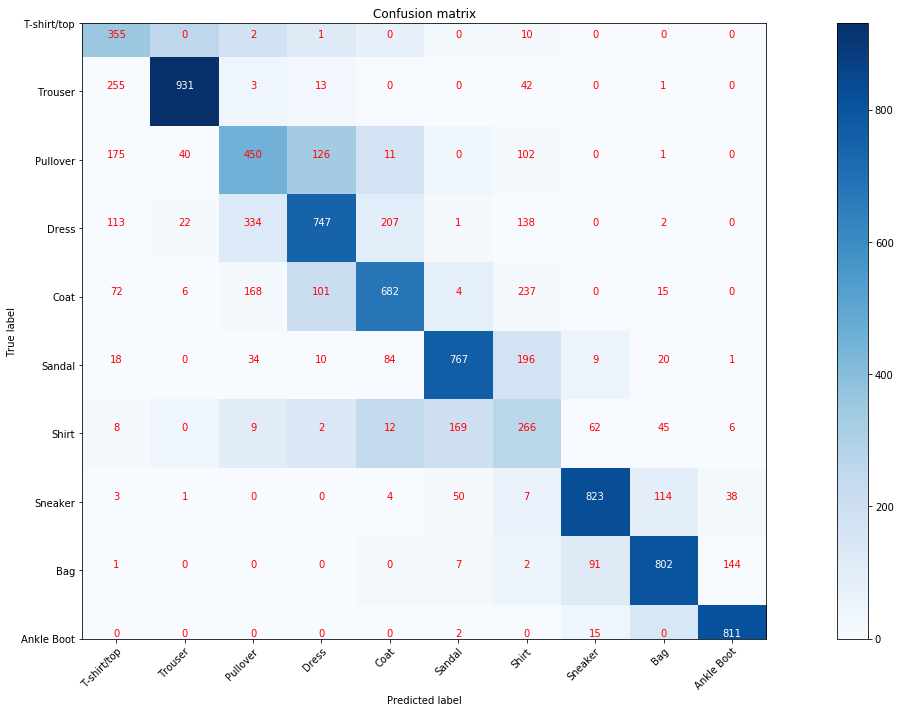

In [60]:
plot_confusion_matrix(test.label.astype('int32'), (y_pred.round().astype('int32')), classes=np.array(list(labels.values())),
                      title='Confusion matrix')

In [61]:
metrics_df.loc[2,'model']="Random Forest <10 trees>"
metrics_df.loc[2,'accuracy_score']=accuracy_score(test.label.astype('int32'), (y_pred.round().astype('int32')))
metrics_df.loc[2,'precision_score']=precision_score(test.label.astype('int32'), (y_pred.round().astype('int32')), average="weighted")
metrics_df.loc[2,'recall_score']=recall_score(test.label.astype('int32'), (y_pred.round().astype('int32')), average="weighted")
metrics_df.loc[2,'f1_score']=f1_score(test.label.astype('int32'), (y_pred.round().astype('int32')), average="weighted")
metrics_df.loc[2,'execution_time']=final_time

### Model 3: Generate a model using Gradient Boost

In [62]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1,1.25,1.5,1.75]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(train.iloc[:,1:], train.iloc[:,0:1].values.ravel())

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(train.iloc[:,1:], train.iloc[:,0:1])))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(test.iloc[:,1:], test.iloc[:,0:1])))

Learning rate:  0.05
Accuracy score (training): 0.710
Accuracy score (validation): 0.711
Learning rate:  0.075
Accuracy score (training): 0.720
Accuracy score (validation): 0.722
Learning rate:  0.1
Accuracy score (training): 0.730
Accuracy score (validation): 0.729
Learning rate:  0.25
Accuracy score (training): 0.755
Accuracy score (validation): 0.755
Learning rate:  0.5
Accuracy score (training): 0.774
Accuracy score (validation): 0.775
Learning rate:  0.75
Accuracy score (training): 0.788
Accuracy score (validation): 0.783
Learning rate:  1
Accuracy score (training): 0.786
Accuracy score (validation): 0.780
Learning rate:  1.25
Accuracy score (training): 0.789
Accuracy score (validation): 0.777
Learning rate:  1.5
Accuracy score (training): 0.098
Accuracy score (validation): 0.098
Learning rate:  1.75
Accuracy score (training): 0.106
Accuracy score (validation): 0.106


In [63]:
%%time
start = time.time()

gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(train.iloc[:,1:], train.iloc[:,0:1].values.ravel())
y_pred = gb_clf2.predict(test.iloc[:,1:])

end = time.time()
final_time = end-start
classifier_results['classifier'].append('Gradient Boost')
classifier_results['execution_time'].append(final_time)

Wall time: 9.22 s


In [64]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test.iloc[:,0:1], y_pred))
classifier_results['accuracy'].append(metrics.accuracy_score(test.iloc[:,0:1], y_pred))

Accuracy: 0.78


In [ ]:
print("Actual Results:")
print(confusion_matrix(test.iloc[:,0:1], test.iloc[:,0:1]))

print("Confusion Matrix:")
print(confusion_matrix(test.iloc[:,0:1], y_pred))

print("Classification Report")
print(classification_report(test.iloc[:,0:1], y_pred))

Confusion matrix, without normalization
[[729  10  15  71  17   5 119   1  33   0]
 [  6 926   9  39  11   2   5   1   1   0]
 [ 13   8 659   9 154   1 140   0  16   0]
 [ 38  38   8 813  54   1  40   0   8   0]
 [  6  10 159  45 684   1  88   0   7   0]
 [  1   2   2   1   0 848   0  93   6  47]
 [164   9 119  48 132   5 488   0  35   0]
 [  0   0   0   0   0  60   0 856   4  80]
 [  2   5  16  15   9  14  28   8 901   2]
 [  0   0   1   0   0  29   2  64   8 896]]


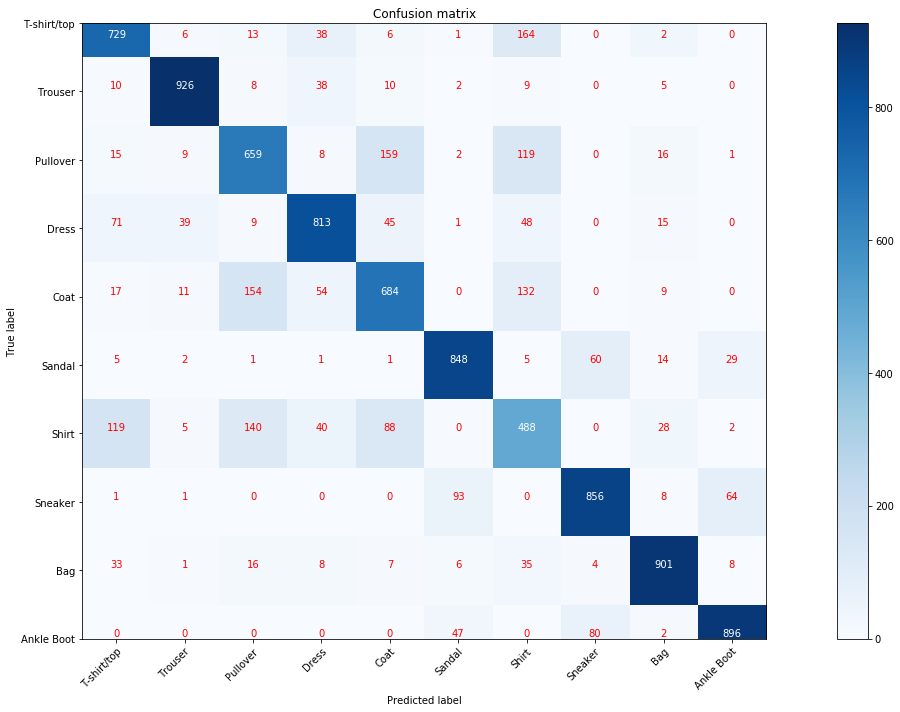

In [65]:
plot_confusion_matrix(test.iloc[:,0:1], y_pred, classes=np.array(list(labels.values())),
                      title='Confusion matrix')

In [66]:
metrics_df.loc[1,'model']="Gradient Boost"
metrics_df.loc[1,'accuracy_score']=accuracy_score(test.iloc[:,0:1], y_pred)
metrics_df.loc[1,'precision_score']=precision_score(test.iloc[:,0:1], y_pred, average="weighted")
metrics_df.loc[1,'recall_score']=recall_score(test.iloc[:,0:1], y_pred, average="weighted")
metrics_df.loc[1,'f1_score']=f1_score(test.iloc[:,0:1], y_pred, average="weighted")
metrics_df.loc[1,'execution_time']=final_time

### Model 4: Generate a model using XGBoost

In [67]:
%%time
start = time.time()

xgb_clf = XGBClassifier()
xgb_clf.fit(train.iloc[:,1:], train.iloc[:,0:1].values.ravel())
score = xgb_clf.score(test.iloc[:,1:], test.iloc[:,0:1])
print('Score :{}'.format(score))
y_pred = xgb_clf.predict(test.iloc[:,1:])

end = time.time()
final_time = end-start
classifier_results['classifier'].append('XGBoost')
classifier_results['execution_time'].append(final_time)

Score :0.8674
Wall time: 32min 4s


In [68]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test.iloc[:,0:1], y_pred))
classifier_results['accuracy'].append(metrics.accuracy_score(test.iloc[:,0:1], y_pred))

Accuracy: 0.8674


In [ ]:
print("Actual Results:")
print(confusion_matrix(test.iloc[:,0:1], test.iloc[:,0:1]))

print("Confusion Matrix:")
print(confusion_matrix(test.iloc[:,0:1], y_pred))

print("Classification Report")
print(classification_report(test.iloc[:,0:1], y_pred))

Confusion matrix, without normalization
[[830   2  11  39   1   1 102   0  14   0]
 [  3 977   4  11   2   1   2   0   0   0]
 [ 10   0 787   9 113   0  70   0  11   0]
 [ 26   9  11 905  24   1  23   0   1   0]
 [  1   1  87  36 811   0  60   0   4   0]
 [  0   0   0   0   0 924   3  54   3  16]
 [180   2 103  23  76   0 602   0  14   0]
 [  0   0   0   0   0   9   0 922   1  68]
 [  2   2   8   2   2   5  13   2 963   1]
 [  0   0   0   0   0   5   1  39   2 953]]


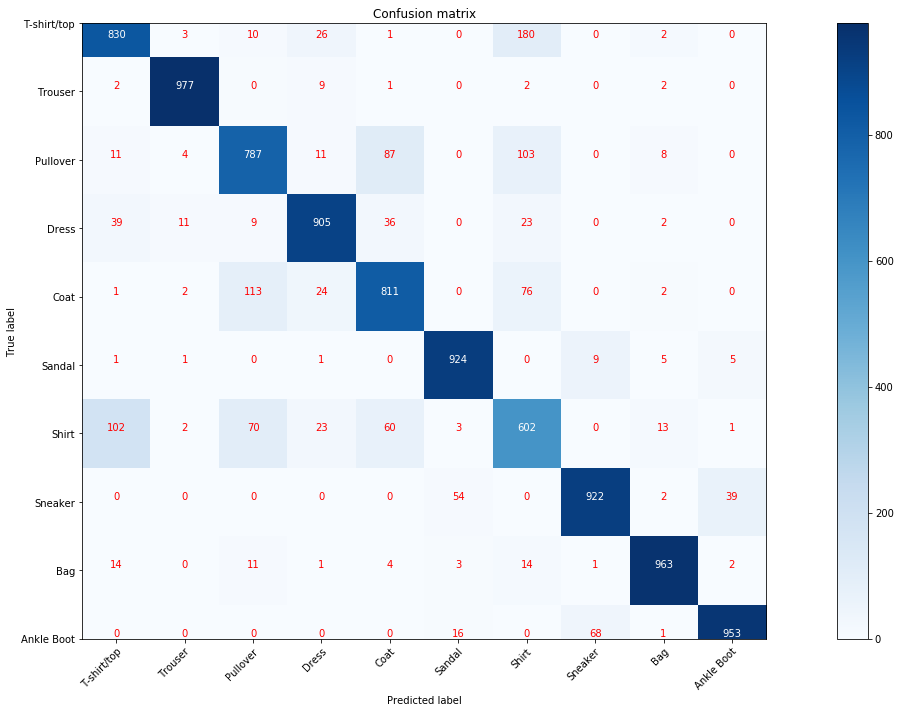

In [69]:
plot_confusion_matrix(test.iloc[:,0:1], y_pred, classes=np.array(list(labels.values())),
                      title='Confusion matrix')

In [70]:
metrics_df.loc[3,'model']="XG Boost"
metrics_df.loc[3,'accuracy_score']=accuracy_score(test.iloc[:,0:1], y_pred)
metrics_df.loc[3,'precision_score']=precision_score(test.iloc[:,0:1], y_pred, average="weighted")
metrics_df.loc[3,'recall_score']=recall_score(test.iloc[:,0:1], y_pred, average="weighted")
metrics_df.loc[3,'f1_score']=f1_score(test.iloc[:,0:1], y_pred, average="weighted")
metrics_df.loc[3,'execution_time']=final_time

### Model 5: Generate a Model using Gradient Descent in TensorFlow 

In [71]:
tf.compat.v1.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [72]:
# MY TEST TO .MAKE SURE TF IS WORKING

hello = tf.constant('Hello, TensorFlow!')
sess = tf.compat.v1.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


In [73]:
# OBTAIN DATA
# DATA WITHIN TF TUTORIAL HAS BEEN PREPROCESSED

# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

In [74]:
mnist=train
mnist.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# creating one hot encoder object with categorical feature 0 
# indicating the first column 
mnist_feature=mnist.iloc[:,1:]
onehotencoder = OneHotEncoder() 
mnist_label = onehotencoder.fit_transform(mnist.iloc[:,0:1]).toarray() 
test_feature=test.iloc[:,1:]
test_label = onehotencoder.fit_transform(test.iloc[:,0:1]).toarray() 

C:\Users\rkrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\rkrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warn

In [76]:
mnist_label=pd.DataFrame(mnist_label.astype(int))
test_label=pd.DataFrame(test_label.astype(int))

In [77]:
# MODEL
# CREATE PLACEHOLDER VARIABLES FOR OPERATION MANIPULATION
# THE 784 MATCHES THE VECTOR SIZE OF THE MNIST IMAGES - 28*28

x = tf.compat.v1.placeholder(tf.float32, [None, 784])
#x = tf.compat.v1.placeholder(tf.float32, [100, 784])

In [78]:
# MODEL
# CREATE WEIGHTS & BIASES VARIABLES
# IN TF, OUR MODEL PARAMETERS ARE OFTEN MANAGED AS VARIABLES

W = tf.compat.v1.Variable(tf.zeros([784, 10]))
b = tf.compat.v1.Variable(tf.zeros([10]))

In [79]:
# MODEL
# CREATE MODEL - USES SOFTMAX AS THE ACTIVATION FUNCTION
# REMEMBER GOAL FOR ACTIVATION FUNCTION IS TO "SHAPE" THE 
# OUTPUT INTO A PROBABILITY DISTRO OVER THE 10 CLASSES

y = tf.nn.softmax(tf.matmul(x, W) + b)


In [80]:
# MODEL
# CREATE PREDICTED VARIABLE Y-HAT
# AND USE CROSS ENTROPY TO DETERMINE LOSS
# CROSS ENTROPY - HOW INEFFICIENT ARE OUR PREDICTIONS?

y_ = tf.compat.v1.placeholder(tf.float32, [None, 10])
#y_ = tf.compat.v1.placeholder(tf.float32, [100, 10])
cross_entropy = tf.reduce_mean(-tf.compat.v1.reduce_sum(y_ * tf.compat.v1.log(y), reduction_indices=[1]))


In [81]:
# MODEL
# TRAIN USING GRADIENT DESCENT
# LEARNING RATE AT MIDPOINT - .5 - MAKE SMALL ADJUSTMENTS TO MINIMIZE COST

train_step = tf.compat.v1.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [82]:
# MODEL - RUN
#sess.close()
sess = tf.compat.v1.InteractiveSession()
tf.compat.v1.global_variables_initializer().run()
# for _ in range(10000):
#  batch_xs, batch_ys = mnist.train.next_batch(100)
#  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [83]:
#for _ in range(600):
#    sess.run(train_step, feed_dict={x: train.iloc[_*100:_*100+100,1:],y_: mnist_label.iloc[_*100:_*100+100,]})
sess.run(train_step, feed_dict={x: train.iloc[:,1:],y_: mnist_label.iloc[:,]})

In [84]:
# EVALUATE MODEL

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: test.iloc[:,1:], y_: test_label.iloc[:,]}))
#print(sess.run(accuracy, feed_dict={x: train.iloc[55000:,1:],y_: mnist_label.iloc[55000:,]}))
#for _ in range(100):
#    print(sess.run(accuracy, feed_dict={x: test.iloc[_*100:_*100+100,1:], y_: test_label.iloc[_*100:_*100+100,]}))

0.307


In [85]:
sess.close()

In [ ]:
plot_confusion_matrix(test.iloc[:,0:1], correct_prediction, classes=np.array(list(labels.values())),
                      title='Confusion matrix')

In [ ]:
metrics_df.loc[4,'model']="Gradient Descent in TensorFlow"
metrics_df.loc[4,'accuracy_score']=accuracy_score(test.iloc[:,0:1], correct_prediction)
metrics_df.loc[4,'precision_score']=precision_score(test.iloc[:,0:1], correct_prediction, average="weighted")
metrics_df.loc[4,'recall_score']=recall_score(test.iloc[:,0:1], correct_prediction, average="weighted")
metrics_df.loc[4,'f1_score']=f1_score(test.iloc[:,0:1], correct_prediction, average="weighted")
metrics_df.loc[4,'execution_time']=final_time

### Model 6: Generate a Model using TensorFlow and Convolution layers

In [88]:
# WEIGHT INITIALIZATION

def weight_variable(shape):
  initial = tf.compat.v1.truncated_normal(shape, stddev=0.1)
  return tf.compat.v1.Variable(initial)

def bias_variable(shape):
  initial = tf.compat.v1.constant(0.1, shape=shape)
  return tf.compat.v1.Variable(initial)

In [89]:
# CREATE CONVOLUTION AND POOLING LAYERS

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [90]:
# FIRST CONVOLUTION LAYER

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.compat.v1.reshape(x, [-1, 28, 28, 1]) # BASE IMAGE SIZE OF 28 * 28

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)  # RESULTING IMAGE SIZE IS 14 * 14


In [91]:
# SECOND CONOLUTION LAYER 
# MORE THAN ONE LAYER?  DEEP LEARNING

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [92]:
# FULLY CONNECTED LAYER - BEFORE OUTPUT

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.compat.v1.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.compat.v1.matmul(h_pool2_flat, W_fc1) + b_fc1)  # ADD THE RECTIFIED LINEAR UNIT


In [93]:
# DROP LAYER - REDUCE OVERFITTING

keep_prob = tf.compat.v1.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [94]:
# LAST LAYER - OUTPUT

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.compat.v1.matmul(h_fc1_drop, W_fc2) + b_fc2

In [95]:
# RUN THE MODEL

cross_entropy = tf.compat.v1.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))

train_step = tf.compat.v1.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))

accuracy = tf.compat.v1.reduce_mean(tf.cast(correct_prediction, tf.float32))



In [96]:
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    train_accuracy=accuracy.eval(feed_dict={x: train.iloc[:,1:],y_: mnist_label.iloc[:,], keep_prob: 1.0})
    print('training accuracy %g' % (train_accuracy))
  #for i in range(10000):
  #  batch = mnist.train.next_batch(50)
  #  if i % 100 == 0:
  #    train_accuracy = accuracy.eval(feed_dict={
  #        x: batch[0], y_: batch[1], keep_prob: 1.0})
  #    print('step %d, training accuracy %g' % (i, train_accuracy))
  #  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
    print('test accuracy %g' % accuracy.eval(feed_dict={x: test.iloc[:,1:], y_: test_label.iloc[:,], keep_prob: 1.0}))

training accuracy 0.1
test accuracy 0.1


In [ ]:
plot_confusion_matrix(test.iloc[:,0:1], correct_prediction, classes=np.array(list(labels.values())),
                      title='Confusion matrix')

In [ ]:
metrics_df.loc[5,'model']="TensorFlow and Convolution layers"
metrics_df.loc[5,'accuracy_score']=accuracy_score(test.iloc[:,0:1], y_pred)
metrics_df.loc[5,'precision_score']=precision_score(test.iloc[:,0:1], y_pred, average="weighted")
metrics_df.loc[5,'recall_score']=recall_score(test.iloc[:,0:1], y_pred, average="weighted")
metrics_df.loc[5,'f1_score']=f1_score(test.iloc[:,0:1], y_pred, average="weighted")
metrics_df.loc[5,'execution_time']=final_time

## Results and Conclusion

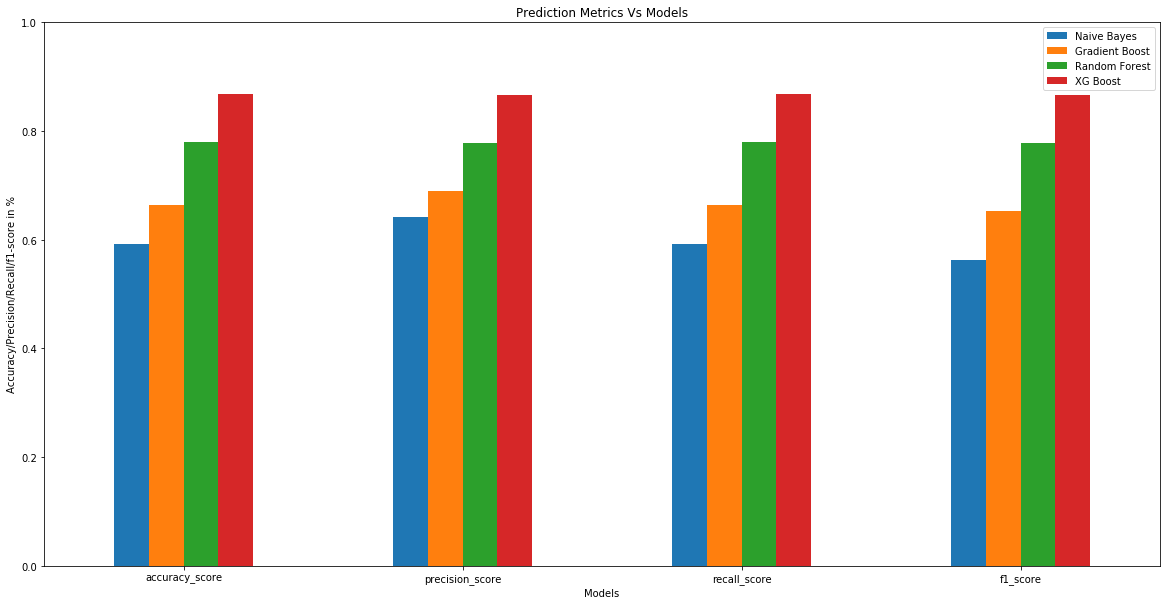

In [100]:
plt.rcParams["figure.figsize"] = (20,10)
nb = metrics_df.T.iloc[1:5,0]
gb =metrics_df.T.iloc[1:5,1]
rf =metrics_df.T.iloc[1:5,2]
xb =metrics_df.T.iloc[1:5,3]
index = ['accuracy_score', 'precision_score', 'recall_score',
         'f1_score']
df = pd.DataFrame({'Naive Bayes': nb,'Gradient Boost': gb,'Random Forest': rf,'XG Boost': xb}, index=index)
ax = df.plot.bar(rot=0)
#bar = ax.bar(x=df.index.values, y=MultinomialNB,height=1)

ax.set_ylim(0,1)
ax.set_title('Prediction Metrics Vs Models')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy/Precision/Recall/f1-score in %')
plt.show()


### Build a MLP Classifier

In [ ]:

import numpy as np
from scipy.special import expit
import sys


class NeuralNetMLP(object):
    """ Feedforward neural network / Multi-layer perceptron classifier.

    Parameters
    ------------
    n_output : int
      Number of output units, should be equal to the
      number of unique class labels.

    n_features : int
      Number of features (dimensions) in the target dataset.
      Should be equal to the number of columns in the X array.

    n_hidden : int (default: 30)
      Number of hidden units.

    l1 : float (default: 0.0)
      Lambda value for L1-regularization.
      No regularization if l1=0.0 (default)

    l2 : float (default: 0.0)
      Lambda value for L2-regularization.
      No regularization if l2=0.0 (default)

    epochs : int (default: 500)
      Number of passes over the training set.

    eta : float (default: 0.001)
      Learning rate.

    alpha : float (default: 0.0)
      Momentum constant. Factor multiplied with the
      gradient of the previous epoch t-1 to improve
      learning speed
      w(t) := w(t) - (grad(t) + alpha*grad(t-1))
    
    decrease_const : float (default: 0.0)
      Decrease constant. Shrinks the learning rate
      after each epoch via eta / (1 + epoch*decrease_const)

    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent circles.

    minibatches : int (default: 1)
      Divides training data into k minibatches for efficiency.
      Normal gradient descent learning if k=1 (default).

    random_state : int (default: None)
      Set random state for shuffling and initializing the weights.

    Attributes
    -----------
    cost_ : list
      Sum of squared errors after each epoch.

    """
    def __init__(self, n_output, n_features, n_hidden=30,
                 l1=0.0, l2=0.0, epochs=500, eta=0.001, 
                 alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1, random_state=None):

        np.random.seed(random_state)
        self.n_output = n_output
        self.n_features = n_features
        self.n_hidden = n_hidden
        self.w1, self.w2 = self._initialize_weights()
        self.l1 = l1
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches

    def _encode_labels(self, y, k):
        """Encode labels into one-hot representation

        Parameters
        ------------
        y : array, shape = [n_samples]
            Target values.

        Returns
        -----------
        onehot : array, shape = (n_labels, n_samples)

        """
        onehot = np.zeros((k, y.shape[0]))
        for idx, val in enumerate(y):
            onehot[val, idx] = 1.0
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        w1 = np.random.uniform(-1.0, 1.0, size=self.n_hidden*(self.n_features + 1))
        w1 = w1.reshape(self.n_hidden, self.n_features + 1)
        w2 = np.random.uniform(-1.0, 1.0, size=self.n_output*(self.n_hidden + 1))
        w2 = w2.reshape(self.n_output, self.n_hidden + 1)
        return w1, w2

    def _sigmoid(self, z):
        """Compute logistic function (sigmoid)

        Uses scipy.special.expit to avoid overflow
        error for very small input values z.

        """
        # return 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    def _sigmoid_gradient(self, z):
        """Compute gradient of the logistic function"""
        sg = self._sigmoid(z)
        return sg * (1 - sg)

    def _add_bias_unit(self, X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            X_new = np.ones((X.shape[0], X.shape[1]+1))
            X_new[:, 1:] = X
        elif how == 'row':
            X_new = np.ones((X.shape[0]+1, X.shape[1]))
            X_new[1:, :] = X
        else:
            raise AttributeError('`how` must be `column` or `row`')
        return X_new

    def _feedforward(self, X, w1, w2):
        """Compute feedforward step

        Parameters
        -----------
        X : array, shape = [n_samples, n_features]
          Input layer with original features.

        w1 : array, shape = [n_hidden_units, n_features]
          Weight matrix for input layer -> hidden layer.

        w2 : array, shape = [n_output_units, n_hidden_units]
          Weight matrix for hidden layer -> output layer.

        Returns
        ----------
        a1 : array, shape = [n_samples, n_features+1]
          Input values with bias unit.

        z2 : array, shape = [n_hidden, n_samples]
          Net input of hidden layer.

        a2 : array, shape = [n_hidden+1, n_samples]
          Activation of hidden layer.

        z3 : array, shape = [n_output_units, n_samples]
          Net input of output layer.

        a3 : array, shape = [n_output_units, n_samples]
          Activation of output layer.

        """
        a1 = self._add_bias_unit(X, how='column')
        z2 = w1.dot(a1.T)
        a2 = self._sigmoid(z2)
        a2 = self._add_bias_unit(a2, how='row')
        z3 = w2.dot(a2)
        a3 = self._sigmoid(z3)
        return a1, z2, a2, z3, a3

    def _L2_reg(self, lambda_, w1, w2):
        """Compute L2-regularization cost"""
        return (lambda_/2.0) * (np.sum(w1[:, 1:] ** 2) + np.sum(w2[:, 1:] ** 2))

    def _L1_reg(self, lambda_, w1, w2):
        """Compute L1-regularization cost"""
        return (lambda_/2.0) * (np.abs(w1[:, 1:]).sum() + np.abs(w2[:, 1:]).sum())

    def _get_cost(self, y_enc, output, w1, w2):
        """Compute cost function.

        y_enc : array, shape = (n_labels, n_samples)
          one-hot encoded class labels.

        output : array, shape = [n_output_units, n_samples]
          Activation of the output layer (feedforward)

        w1 : array, shape = [n_hidden_units, n_features]
          Weight matrix for input layer -> hidden layer.

        w2 : array, shape = [n_output_units, n_hidden_units]
          Weight matrix for hidden layer -> output layer.

        Returns
        ---------
        cost : float
          Regularized cost.

        """
        term1 = -y_enc * (np.log(output))
        term2 = (1 - y_enc) * np.log(1 - output)
        cost = np.sum(term1 - term2)
        L1_term = self._L1_reg(self.l1, w1, w2)
        L2_term = self._L2_reg(self.l2, w1, w2)
        cost = cost + L1_term + L2_term
        return cost

    def _get_gradient(self, a1, a2, a3, z2, y_enc, w1, w2):
        """ Compute gradient step using backpropagation.

        Parameters
        ------------
        a1 : array, shape = [n_samples, n_features+1]
          Input values with bias unit.

        a2 : array, shape = [n_hidden+1, n_samples]
          Activation of hidden layer.

        a3 : array, shape = [n_output_units, n_samples]
          Activation of output layer.

        z2 : array, shape = [n_hidden, n_samples]
          Net input of hidden layer.

        y_enc : array, shape = (n_labels, n_samples)
          one-hot encoded class labels.

        w1 : array, shape = [n_hidden_units, n_features]
          Weight matrix for input layer -> hidden layer.

        w2 : array, shape = [n_output_units, n_hidden_units]
          Weight matrix for hidden layer -> output layer.

        Returns
        ---------

        grad1 : array, shape = [n_hidden_units, n_features]
          Gradient of the weight matrix w1.

        grad2 : array, shape = [n_output_units, n_hidden_units]
            Gradient of the weight matrix w2.

        """
        # backpropagation
        sigma3 = a3 - y_enc
        z2 = self._add_bias_unit(z2, how='row')
        sigma2 = w2.T.dot(sigma3) * self._sigmoid_gradient(z2)
        sigma2 = sigma2[1:, :]
        grad1 = sigma2.dot(a1)
        grad2 = sigma3.dot(a2.T)

        # regularize
        grad1[:, 1:] += (w1[:, 1:] * (self.l1 + self.l2))
        grad2[:, 1:] += (w2[:, 1:] * (self.l1 + self.l2))

        return grad1, grad2

    def predict(self, X):
        """Predict class labels

        Parameters
        -----------
        X : array, shape = [n_samples, n_features]
          Input layer with original features.

        Returns:
        ----------
        y_pred : array, shape = [n_samples]
          Predicted class labels.

        """
        if len(X.shape) != 2:
            raise AttributeError('X must be a [n_samples, n_features] array.\n'
                                 'Use X[:,None] for 1-feature classification,'
                                 '\nor X[[i]] for 1-sample classification')

        a1, z2, a2, z3, a3 = self._feedforward(X, self.w1, self.w2)
        y_pred = np.argmax(z3, axis=0)
        return y_pred

    # FUNCTION FOR FITTING MLP 
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data.

        Parameters
        -----------
        X : array, shape = [n_samples, n_features]
          Input layer with original features.

        y : array, shape = [n_samples]
          Target class labels.

        print_progress : bool (default: False)
          Prints progress as the number of epochs
          to stderr.

        Returns:
        ----------
        self

        """
        self.cost_ = []
        X_data, y_data = X.copy(), y.copy()
        y_enc = self._encode_labels(y, self.n_output)

        delta_w1_prev = np.zeros(self.w1.shape)
        delta_w2_prev = np.zeros(self.w2.shape)

        for i in range(self.epochs):
            
            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx = np.random.permutation(y_data.shape[0])
                X_data, y_enc = X_data[idx], y_enc[:, idx]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            for idx in mini:

                # feedforward
                a1, z2, a2, z3, a3 = self._feedforward(X_data[idx], self.w1, self.w2)
                cost = self._get_cost(y_enc=y_enc[:, idx],
                                      output=a3,
                                      w1=self.w1,
                                      w2=self.w2)
                self.cost_.append(cost)

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(a1=a1, a2=a2,
                                                  a3=a3, z2=z2,
                                                  y_enc=y_enc[:, idx],
                                                  w1=self.w1,
                                                  w2=self.w2)

                delta_w1, delta_w2 = self.eta * grad1, self.eta * grad2
                self.w1 -= (delta_w1 + (self.alpha * delta_w1_prev))
                self.w2 -= (delta_w2 + (self.alpha * delta_w2_prev))
                delta_w1_prev, delta_w2_prev = delta_w1, delta_w2

        return self

In [ ]:
nn = NeuralNetMLP(n_output=10, 
                  n_features=train.shape[1]-1, 
                  n_hidden=50, 
                  l2=0.1, 
                  l1=0.0, 
                  epochs=1000, 
                  eta=0.001,
                  alpha=0.001,
                  decrease_const=0.00001,
                  minibatches=50, 
                  shuffle=True,
                  random_state=1)

In [ ]:
test.iloc[:,1:]

In [ ]:
train.label

In [ ]:
start = time.time()

nn.fit(train.iloc[:,1:], train.label, print_progress=True)

end = time.time()
final_time = end-start


# Use the forest's predict method on the test data
y_pred = nn.predict(test.iloc[:,1:])

end = time.time()
final_time = end-start
classifier_results['classifier'].append('Multi-layer Perceptron')
classifier_results['execution_time'].append(final_time)

print(final_time)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test.iloc[:,0:1], y_pred))
classifier_results['accuracy'].append(metrics.accuracy_score(test.iloc[:,0:1], y_pred))

In [ ]:
print("Actual Results:")
print(confusion_matrix(test.iloc[:,0:1], test.iloc[:,0:1]))

print("Confusion Matrix:")
print(confusion_matrix(test.iloc[:,0:1], y_pred))

print("Classification Report")
print(classification_report(test.iloc[:,0:1], y_pred))

In [ ]:
y=train.label
onehot = np.zeros((10, y.shape[0]))
for idx, val in enumerate(y):
    onehot[val, idx] = 1.0
onehot
idx = np.random.permutation(60000)
onehot=onehot[:, idx]

In [ ]:
train.label.dtype

In [ ]:
y=train.label
onehot = np.zeros((10, y.shape[0]))
for idx, val in enumerate(y):
    #onehot[val, idx] = 1.0
    print(idx,val)